#  **Housing Prices Analysis in Top Tier Cities in India**

## <pre> Mounting Google Drive into Google Colab </pre>

In [19]:
from google.colab import drive

In [20]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls '/content/gdrive/My Drive/Projects/EDAHousing'

Bangalore.csv  Chennai.csv  Delhi.csv  Hyderabad.csv  Kolkata.csv  Mumbai.csv


***

### <pre>Importing Required Libraries</pre>

In [ ]:
pip install geopy

In [21]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim
import folium
from folium import plugins

%matplotlib inline

***

![Bangalore Image](https://media.giphy.com/media/LnWAqDfCpfPSmnedvT/giphy.gif)

In [22]:
bangalore_df = pd.read_csv('/content/gdrive/My Drive/Projects/EDAHousing/Bangalore.csv')

In [23]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [24]:
bangalore_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1660,7900000,1393,RR Nagar,3,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
714,6791000,1386,JP Nagar Phase 8,3,0,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1568,5100000,1280,Bommasandra,3,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5298,5352000,1350,Sarjapur Road,2,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2637,3711999,1425,Kammanahalli,3,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


***

![Delhi Image](https://media.giphy.com/media/hSEwaRIfSa4np4l5d5/giphy.gif)

In [25]:
delhi_df = pd.read_csv('/content/gdrive/My Drive/Projects/EDAHousing/Delhi.csv')

In [26]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [27]:
delhi_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
3136,50000000,1097,Delhi,4,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2914,70000000,2500,Hari Nagar,4,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2516,4700000,516,Badarpur,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1014,34100000,3800,Sector 11 Dwarka,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1837,2700000,625,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


***

![Mumbai Image](https://media.giphy.com/media/STrgyibuarMZKHDQms/giphy.gif)

In [28]:
mumbai_df = pd.read_csv('/content/gdrive/My Drive/Projects/EDAHousing/Mumbai.csv')

In [29]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [30]:
mumbai_df.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
3835,16000000,900,Panvel,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
2298,37000000,1850,Dahisar,3,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6415,5400000,700,Ulwe,1,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3260,27599999,783,Thane West,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1506,15000000,1069,Dahisar,2,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


<pre>We have imported Bangalore, Delhi & Mumbai Datasets, 
and it shows that there are some 40 variables/features in the data including the Price.</pre>

As per the Data Definition, `Price`, `Area`, `Location` & `Bedrooms` are Numerical/Continuous variables, rest all are Categorical Variables.
But these Categorical variables have three types of values, <br>
<code>0 = Particular facility is absent in the House</code><br>
<code>1 = Particular facility is present in the House</code><br>
<code>9 = No information is available for the variable, whether it is present or not</code>

***

### <pre>Handling Missing Values</pre>

In [31]:
bangalore_df.replace(9,np.nan, inplace=True)
delhi_df.replace(9,np.nan, inplace=True)
mumbai_df.replace(9,np.nan, inplace=True)

In [32]:
bangalore_df.dropna(axis=0, inplace=True)
delhi_df.dropna(axis=0, inplace=True)
mumbai_df.dropna(axis=0, inplace=True)

In [33]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1951 non-null   int64  
 1   Area                 1951 non-null   int64  
 2   Location             1951 non-null   object 
 3   No. of Bedrooms      1951 non-null   int64  
 4   Resale               1951 non-null   int64  
 5   MaintenanceStaff     1951 non-null   float64
 6   Gymnasium            1951 non-null   float64
 7   SwimmingPool         1951 non-null   float64
 8   LandscapedGardens    1951 non-null   float64
 9   JoggingTrack         1951 non-null   float64
 10  RainWaterHarvesting  1951 non-null   float64
 11  IndoorGames          1951 non-null   float64
 12  ShoppingMall         1951 non-null   float64
 13  Intercom             1951 non-null   float64
 14  SportsFacility       1951 non-null   float64
 15  ATM                  1951 non-null   f

In [34]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2002 non-null   int64  
 1   Area                 2002 non-null   int64  
 2   Location             2002 non-null   object 
 3   No. of Bedrooms      2002 non-null   int64  
 4   Resale               2002 non-null   int64  
 5   MaintenanceStaff     2002 non-null   float64
 6   Gymnasium            2002 non-null   float64
 7   SwimmingPool         2002 non-null   float64
 8   LandscapedGardens    2002 non-null   float64
 9   JoggingTrack         2002 non-null   float64
 10  RainWaterHarvesting  2002 non-null   float64
 11  IndoorGames          2002 non-null   float64
 12  ShoppingMall         2002 non-null   float64
 13  Intercom             2002 non-null   float64
 14  SportsFacility       2002 non-null   float64
 15  ATM                  2002 non-null   f

In [35]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1398 non-null   int64  
 1   Area                 1398 non-null   int64  
 2   Location             1398 non-null   object 
 3   No. of Bedrooms      1398 non-null   int64  
 4   Resale               1398 non-null   int64  
 5   MaintenanceStaff     1398 non-null   float64
 6   Gymnasium            1398 non-null   float64
 7   SwimmingPool         1398 non-null   float64
 8   LandscapedGardens    1398 non-null   float64
 9   JoggingTrack         1398 non-null   float64
 10  RainWaterHarvesting  1398 non-null   float64
 11  IndoorGames          1398 non-null   float64
 12  ShoppingMall         1398 non-null   float64
 13  Intercom             1398 non-null   float64
 14  SportsFacility       1398 non-null   float64
 15  ATM                  1398 non-null   f

We performed some Cleaning Process, and removed the Missing values,i.e. `9s` from all the categorical values, because it contains a big portion of the data as missing, so it cannot be imputed with majority category of the variable, it may impact the analysis.
In order to do that we converted all `9s` to `NaN` values and removed those rows.
As a result we are left with `1951` entries in Bangalore, `2002` entries in Delhi & `1398` entries in Mumbai Data to perform the further analysis.

***

#### Variable Conversions

In [36]:
bangalore_df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [37]:
NonFloatColumns = ['Price','Area','Location','No. of Bedrooms']
ColumnsToConvert = []
for col in bangalore_df.columns:
    if col not in NonFloatColumns:
        ColumnsToConvert.append(col)
ColumnsToConvert

['Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

While Handling Missing Values, we realized that the Categorical Variables(By Definition) are actually Numeric in nature, so we identified the list of all those columns and below we will convert them to required DataType, i.e. Object(String)

In [38]:
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].astype(str)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].astype(str)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].astype(str)

In [39]:
replace_dict = {'0':'No','1':'Yes','0.0':'No','1.0':'Yes'}
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].replace(replace_dict)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].replace(replace_dict)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].replace(replace_dict)

In [40]:
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No
1,7888000,1045,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
2,4866000,1179,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No
3,8358000,1675,Doddanekundi,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No
4,6845000,1670,Kengeri,3,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No


In [41]:
delhi_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,Yes,No,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
1,6000000,1000,Uttam Nagar,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,15000000,1350,Sarita Vihar,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,2500000,435,Uttam Nagar,2,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No
4,5800000,900,Dwarka Mor,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No


In [42]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No
1,4500000,600,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No
2,6700000,650,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
3,4500000,650,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No
4,5000000,665,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No


***

#### Feature Scaling

`Price`, `Area` & `Bedrooms` are only Numerical Variables in our data, but they are not of same order, like Price is having very high values, so it is difficult to interpret them with `Area` & `Bedrooms` on plots. So we will take them on the same scale

In [43]:
# Converting Price to Tens of Lacs
bangalore_df.Price = bangalore_df.Price/100000
delhi_df.Price = delhi_df.Price/100000
mumbai_df.Price = mumbai_df.Price/100000

In [44]:
#Converting Area to Hundreds of Sq feet
bangalore_df.Area = bangalore_df.Area/100
delhi_df.Area = delhi_df.Area/100
mumbai_df.Area = mumbai_df.Area/100

In [45]:
bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,300.00,33.40,JP Nagar Phase 1,4,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No
1,78.88,10.45,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
2,48.66,11.79,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No
3,83.58,16.75,Doddanekundi,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No
4,68.45,16.70,Kengeri,3,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No


In [46]:
bangalore_df.describe()

,Price,Area,No. of Bedrooms
count,1951.000000,1951.000000,1951.000000
mean,99.530030,15.156028,2.532035
std,129.301584,7.640693,0.677002
min,20.960000,5.250000,1.000000
25%,49.735000,11.470000,2.000000
50%,69.500000,13.300000,3.000000
75%,100.000000,16.100000,3.000000
max,2027.000000,99.000000,5.000000


In [47]:
delhi_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,105.0,12.00,Sector 10 Dwarka,2,Yes,No,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
1,60.0,10.00,Uttam Nagar,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,150.0,13.50,Sarita Vihar,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,25.0,4.35,Uttam Nagar,2,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No
4,58.0,9.00,Dwarka Mor,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No


In [48]:
delhi_df.describe()

,Price,Area,No. of Bedrooms
count,2002.000000,2002.000000,2002.000000
mean,102.947158,12.001414,2.688811
std,91.198484,6.143408,0.729588
min,20.000000,2.000000,1.000000
25%,36.000000,7.200000,2.000000
50%,70.000000,10.000000,3.000000
75%,155.000000,17.000000,3.000000
max,1625.000000,64.000000,5.000000


In [49]:
mumbai_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,48.5,7.20,Kharghar,1,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No
1,45.0,6.00,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No
2,67.0,6.50,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No
3,45.0,6.50,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No
4,50.0,6.65,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No


In [50]:
mumbai_df.describe()

,Price,Area,No. of Bedrooms
count,1398.000000,1398.000000,1398.000000
mean,154.244542,10.747346,1.958512
std,252.926812,5.908541,0.870906
min,20.000000,2.450000,1.000000
25%,55.000000,6.500000,1.000000
50%,99.500000,10.110000,2.000000
75%,168.000000,13.100000,3.000000
max,4000.000000,70.000000,6.000000


***

#### Plotting & Analysis

According the variables, we have figured out 2 different Categories for the Variables as <br>
- `Important Amenities` like `Club House`,`Gym`,`SwimmingPool`,etc. <br>
- `Furnishing` like `Sofa`,`Wardrobe`,`TV`,etc. So that we can analyze different categories and their impact on the Price.

In [51]:
ImpAmenitiesColumns = ['Resale','Gymnasium','SwimmingPool','ClubHouse','School','24X7Security','PowerBackup','CarParking','Hospital']
FurnishingColumns = ['DiningTable','Sofa','Wardrobe','Refrigerator','Microwave','TV','BED','AC','Wifi','Gasconnection']

In [52]:
# Function for plotting Imp Amenities as HUE with Price and Area

def ImpAmenitiesPlot(df):
  fig, axes = plt.subplots(3,3, figsize=(18,9))
  
  col = 0
  for i in range(3):
    for j in range(3):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(ImpAmenitiesColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=ImpAmenitiesColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=3)

In [53]:
# Function for plotting Furnishing as HUE with Price and Area
def FurnishingPlot(df):
  fig, axes = plt.subplots(2,5, figsize=(25,10))

  col = 0
  for i in range(2):
    for j in range(5):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(FurnishingColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=FurnishingColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=2)

In [54]:
# Function for plotting Line Plots of Price with Bedrooms & Area to analyse the trend
def LinePlots(df):
  fig,axes = plt.subplots(1,2, figsize=(18,4))
  sns.lineplot(x='No. of Bedrooms',y='Price',data=df,ax=axes[0])
  sns.lineplot(x='Area',y='Price',data=df,ax=axes[1])
  plt.tight_layout(pad=3)

In [55]:
# Function to Plot Distribution and Variation, to understand the Outliers and Statistical Distribution of Price
def QuadPlot(df):
  fig,axes = plt.subplots(2,2, figsize=(18,8))
  sns.distplot(df['Price'],ax=axes[0,0])
  sns.boxplot(df['Price'],ax=axes[0,1])
  sns.scatterplot(x='No. of Bedrooms', y='Price', data=df, ax=axes[1,0])
  sns.scatterplot(x='Area',y='Price', data=df,ax=axes[1,1])
  plt.tight_layout(pad=3)

***

### **Bangalore**

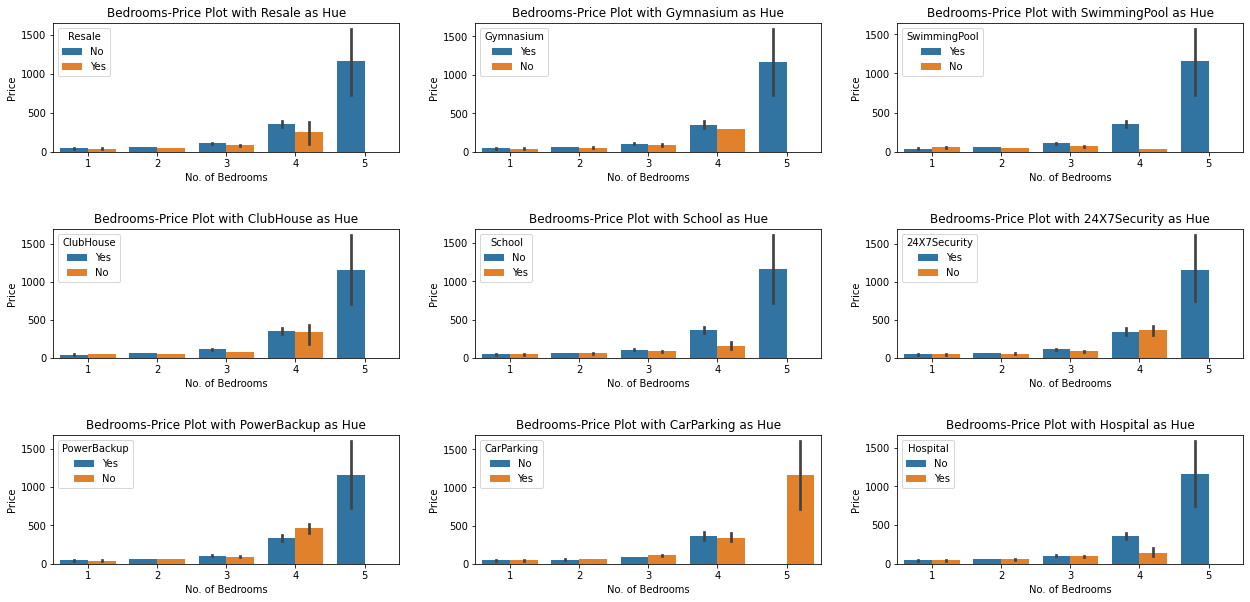

In [56]:
ImpAmenitiesPlot(bangalore_df)

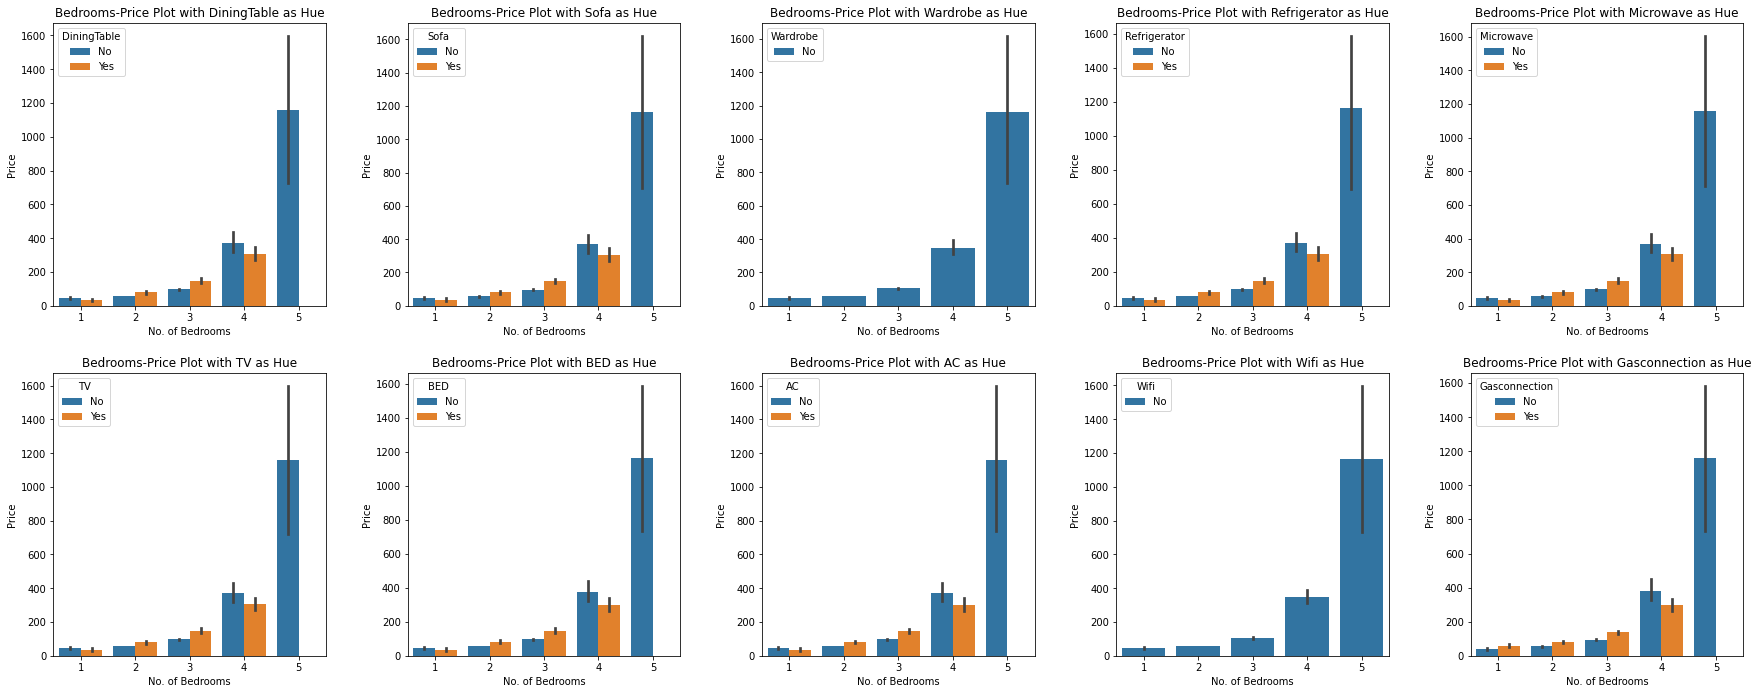

In [57]:
FurnishingPlot(bangalore_df)

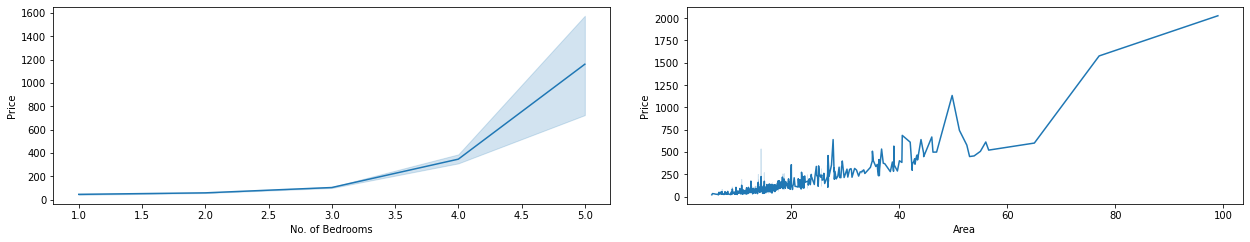

In [58]:
LinePlots(bangalore_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


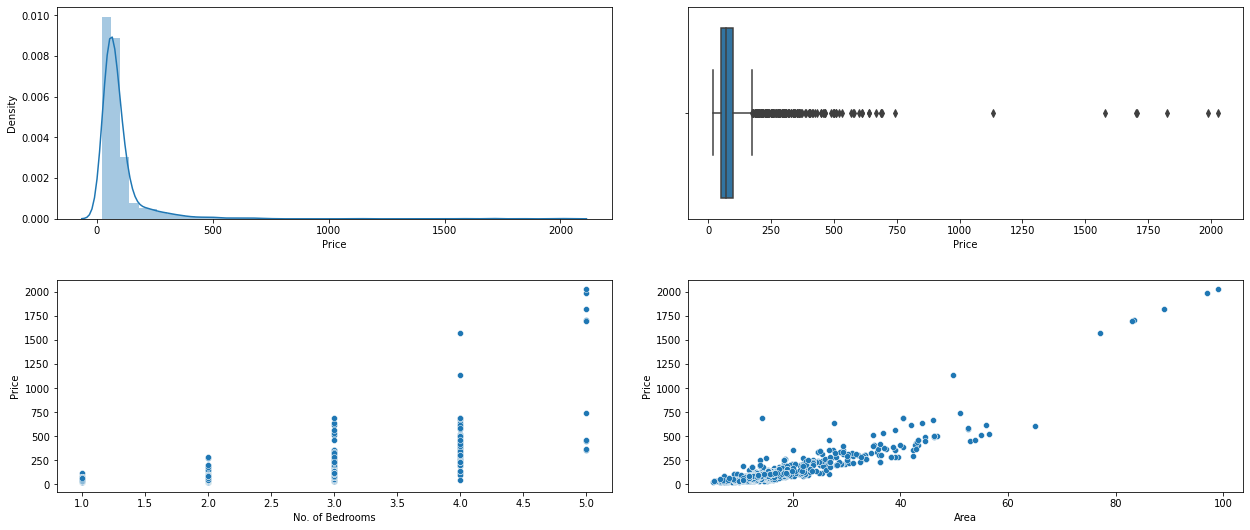

In [59]:
QuadPlot(bangalore_df)

***

### **Delhi**

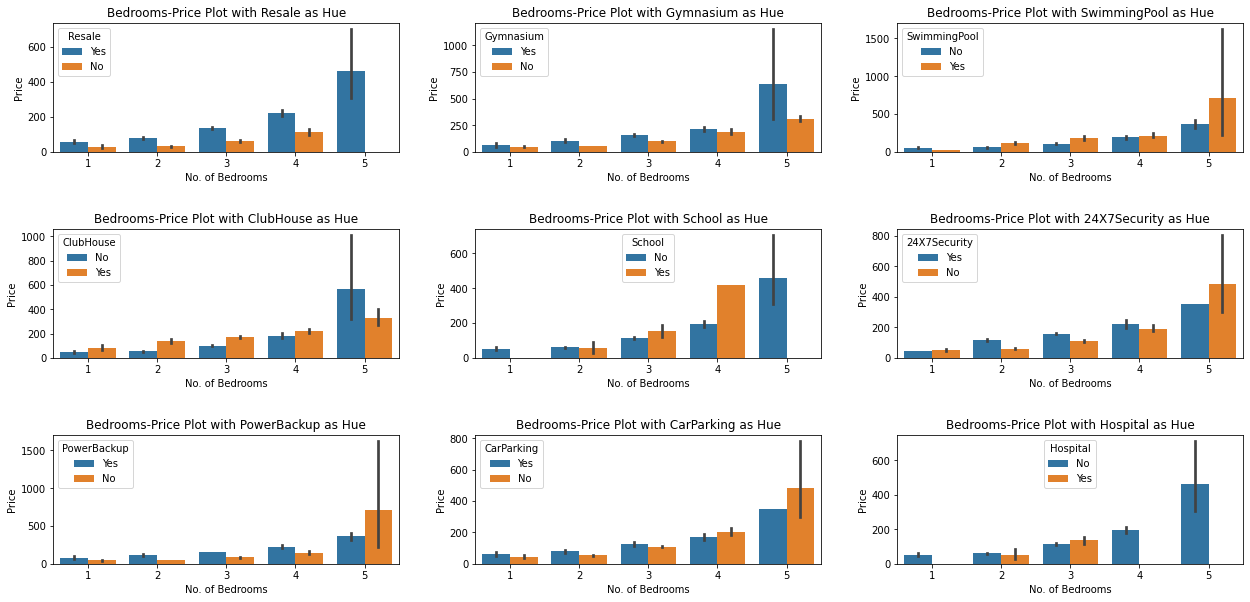

In [60]:
ImpAmenitiesPlot(delhi_df)

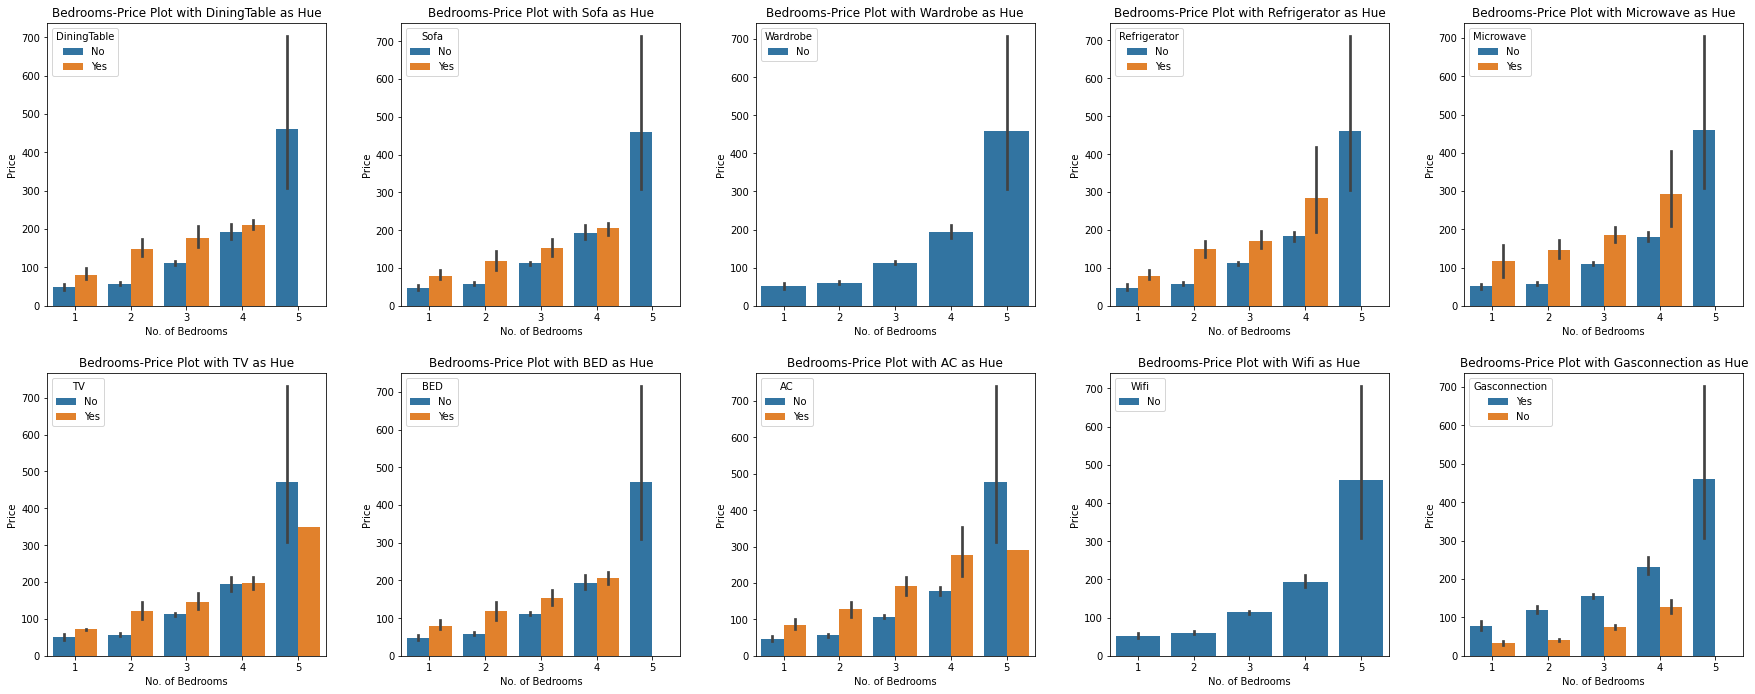

In [61]:
FurnishingPlot(delhi_df)

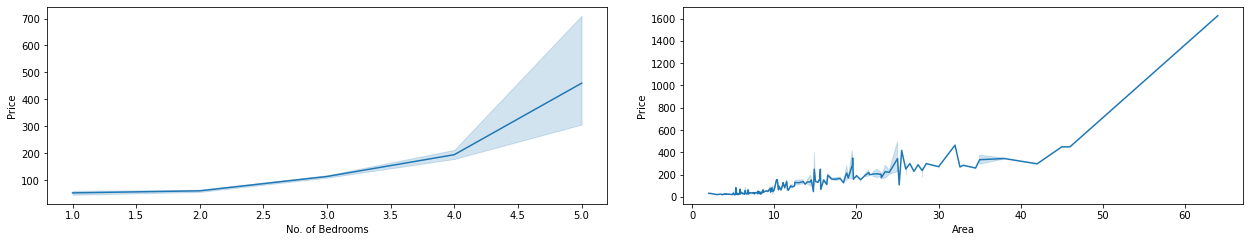

In [62]:
LinePlots(delhi_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


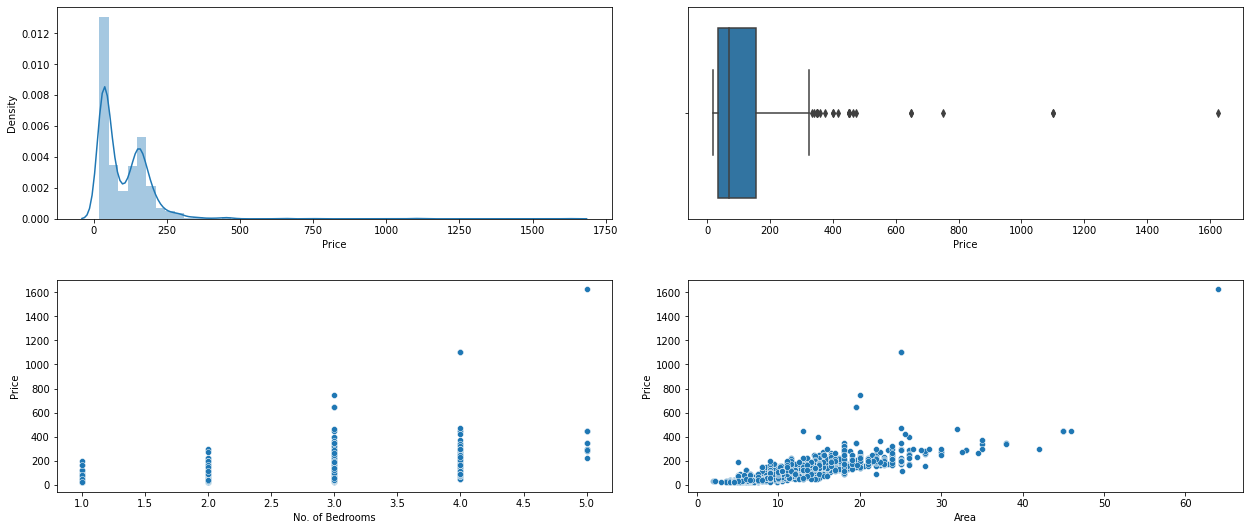

In [63]:
QuadPlot(delhi_df)

***

### **Mumbai**

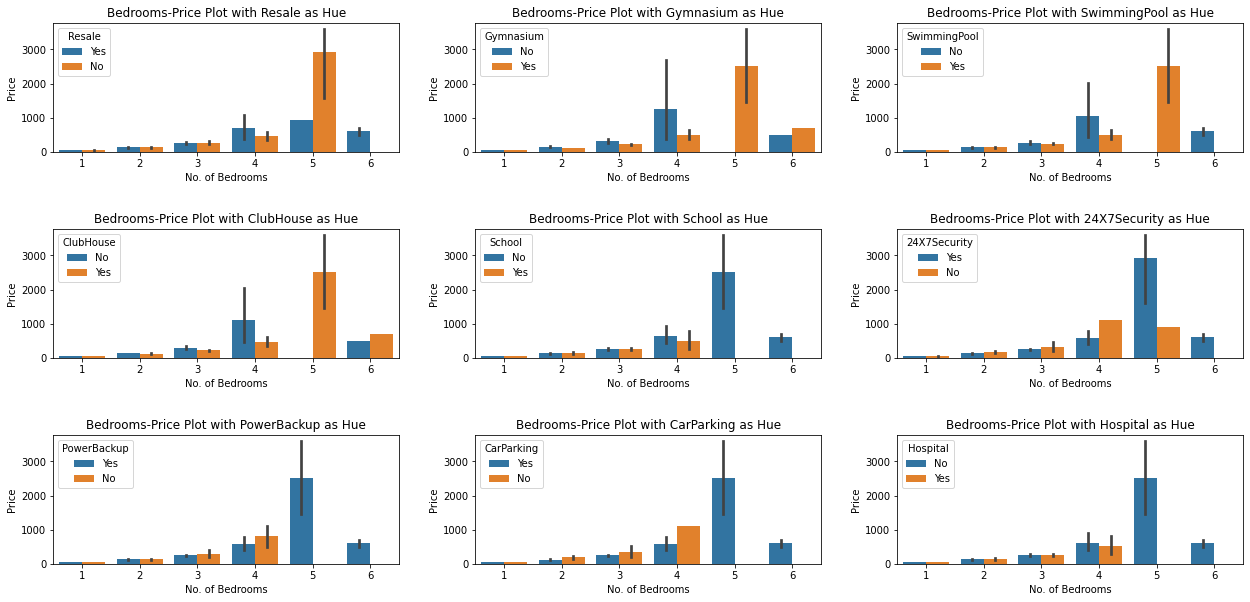

In [64]:
ImpAmenitiesPlot(mumbai_df)

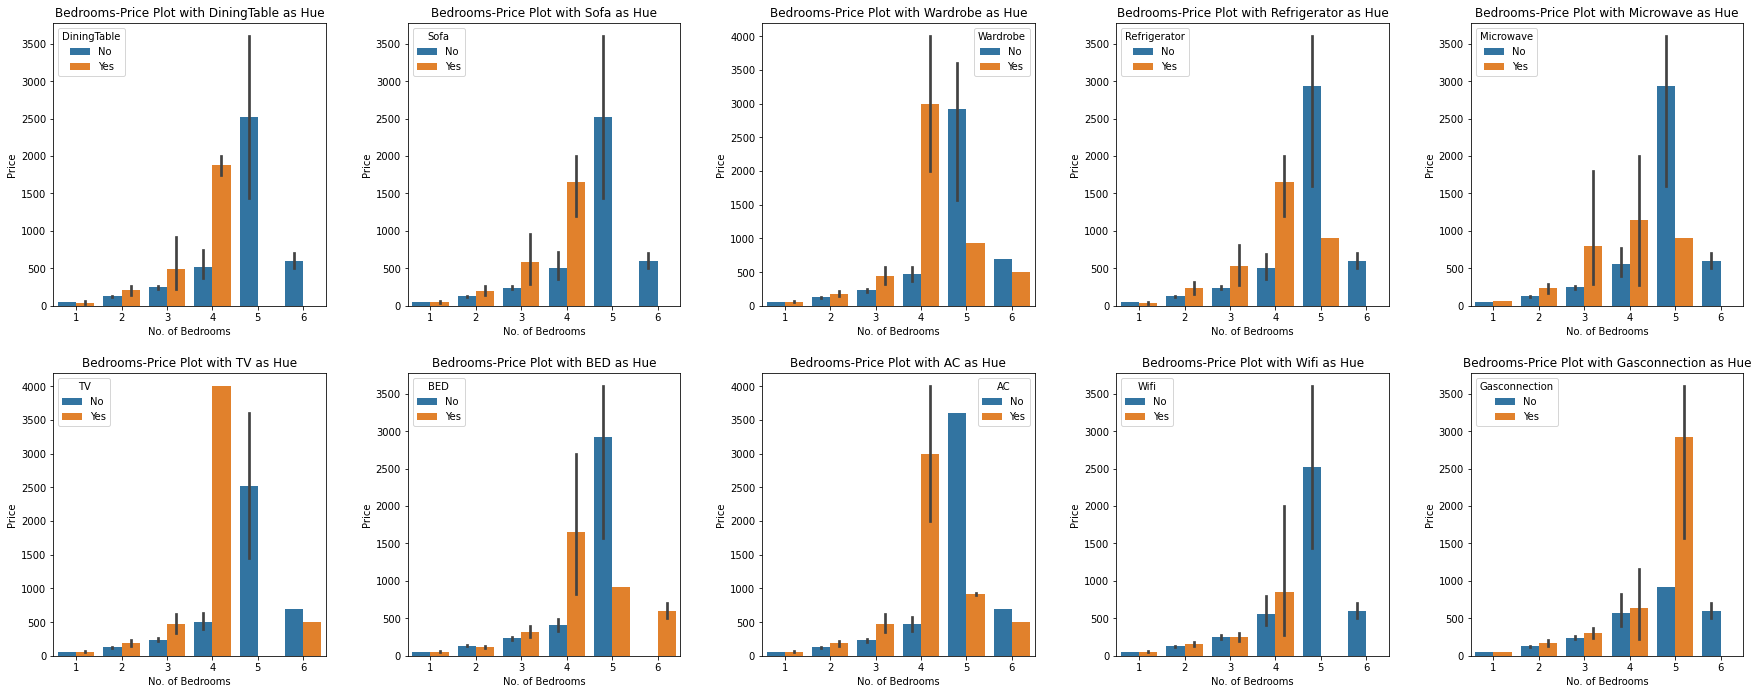

In [65]:
FurnishingPlot(mumbai_df)

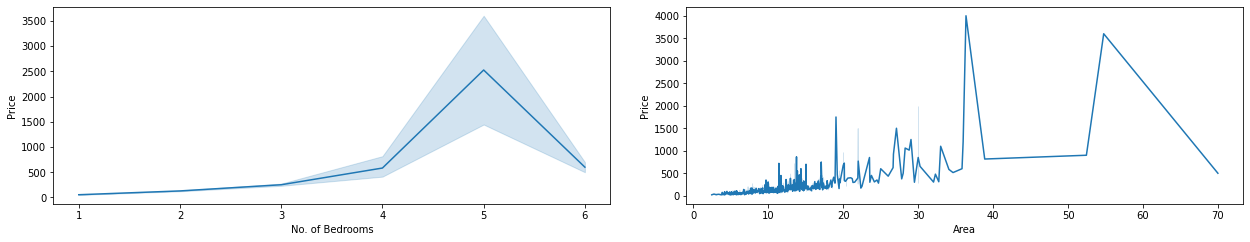

In [66]:
LinePlots(mumbai_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


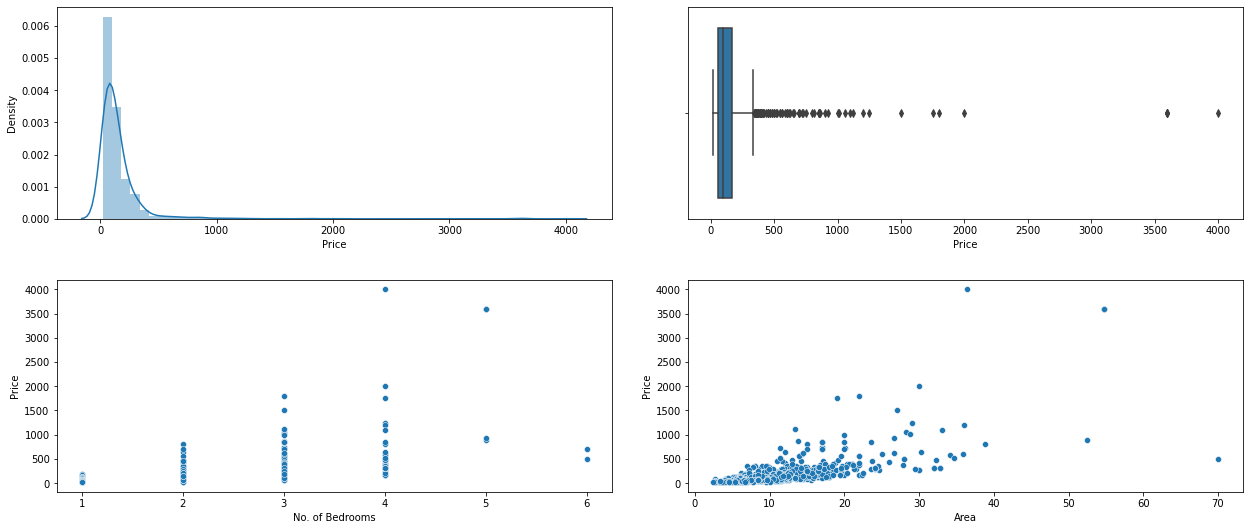

In [67]:
QuadPlot(mumbai_df)

From `BoxPlots` & `ScatterPlots` of all 3 Cities, it is clearly visible that there are some Outliers in `Price`, having very high Prices of some Houses for high values of `Area` and `No. of bedrooms`, so let's look at this point in more detailed way(Statistically).

***

In [68]:
bangalore_df.loc[(bangalore_df['Price']>1000) | (bangalore_df['Area']>60),['Price','Area','No. of Bedrooms']]

,Price,Area,No. of Bedrooms
805,1706.0,83.31,5
806,1823.0,89.02,5
808,601.0,65.00,4
817,1986.0,97.00,5
819,2027.0,99.00,5
820,1700.0,83.00,5
821,1577.0,77.00,4
1926,1134.0,49.77,4


In [69]:
delhi_df.loc[(delhi_df['Price']>1000) | (delhi_df['Area']>60),['Price','Area','No. of Bedrooms']]

,Price,Area,No. of Bedrooms
15,1100.0,25.0,4
35,1100.0,25.0,4
100,1625.0,64.0,5


In [70]:
mumbai_df.loc[(mumbai_df['Price']>1000) | (mumbai_df['Area']>60),['Price','Area','No. of Bedrooms']]

,Price,Area,No. of Bedrooms
299,1060.0,28.26,3
300,1014.0,28.80,3
614,1250.0,29.04,4
879,1800.0,22.00,3
899,3600.0,54.76,5
918,3600.0,54.76,5
930,1750.0,19.03,4
932,1200.0,36.00,4
939,3600.0,54.76,5
970,1500.0,27.10,3


According to the data, reasons for Outliers are if Houses having,<br>
- <code>`Area`>6000 sq.ft.</code>
- <code>`No. of Bedrooms`= 4,5,6</code>

***

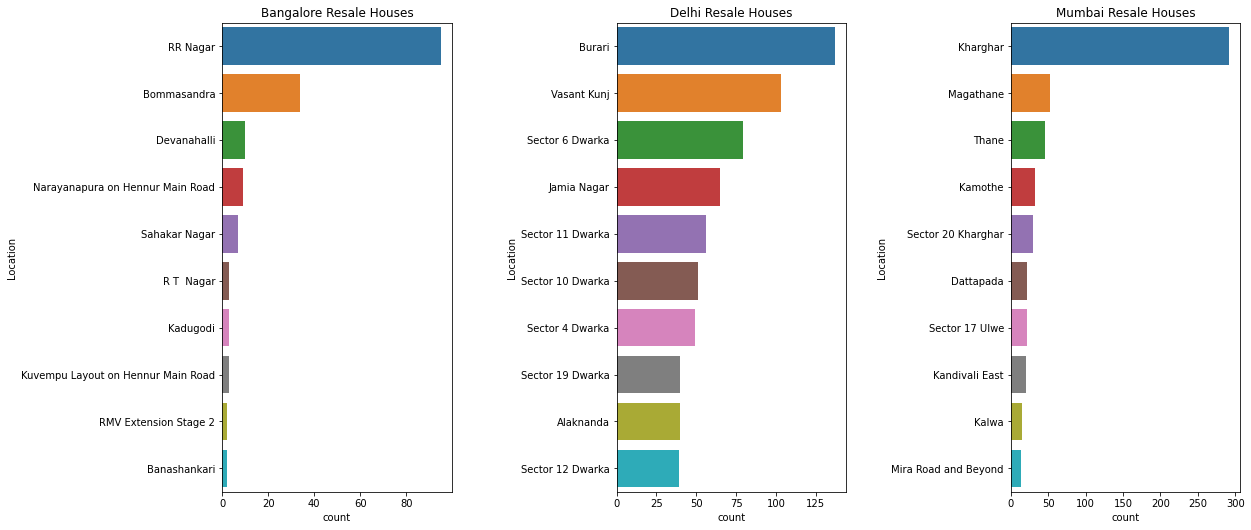

In [71]:
ResaleBLR = bangalore_df[bangalore_df.Resale=='Yes']
ResaleDEL = delhi_df[delhi_df.Resale=='Yes']
ResaleMUM = mumbai_df[mumbai_df.Resale=='Yes']

fig,axes = plt.subplots(1,3,figsize=(18,8))
axes[0].set_title('Bangalore Resale Houses')
sns.countplot(y='Location',data=ResaleBLR,order=ResaleBLR.Location.value_counts().index[:10],ax=axes[0])
axes[1].set_title('Delhi Resale Houses')
sns.countplot(y='Location',data=ResaleDEL,order=ResaleDEL.Location.value_counts().index[:10],ax=axes[1])
axes[2].set_title('Mumbai Resale Houses')
sns.countplot(y='Location',data=ResaleMUM,order=ResaleMUM.Location.value_counts().index[:10],ax=axes[2])
plt.tight_layout(pad=3)
plt.show()

Above are the regions having high number of **Resale** houses

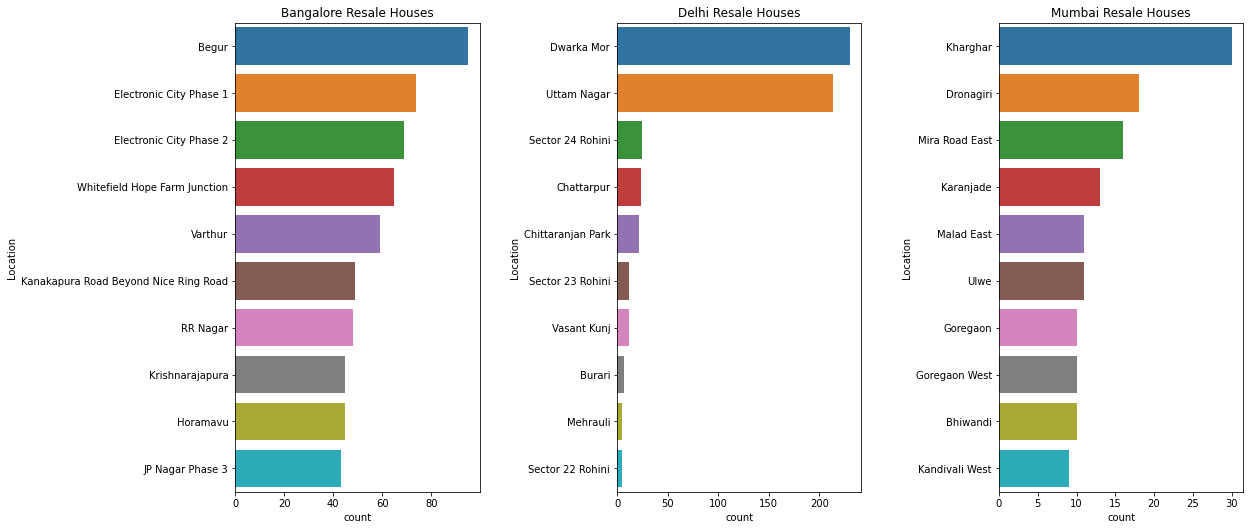

In [72]:
FreshBLR = bangalore_df[bangalore_df.Resale=='No']
FreshDEL = delhi_df[delhi_df.Resale=='No']
FreshMUM = mumbai_df[mumbai_df.Resale=='No']

fig,axes = plt.subplots(1,3,figsize=(18,8))
axes[0].set_title('Bangalore Resale Houses')
sns.countplot(y='Location',data=FreshBLR,order=FreshBLR.Location.value_counts().index[:10],ax=axes[0])
axes[1].set_title('Delhi Resale Houses')
sns.countplot(y='Location',data=FreshDEL,order=FreshDEL.Location.value_counts().index[:10],ax=axes[1])
axes[2].set_title('Mumbai Resale Houses')
sns.countplot(y='Location',data=FreshMUM,order=FreshMUM.Location.value_counts().index[:10],ax=axes[2])
plt.tight_layout(pad=3)
plt.show()

Above are the regions having high number of **Fresh** houses

***

### Plotting Houses on Map in each City

In [73]:
def getCoordinates(Location,City):
  loc = Location+", "+City
  print(loc)
  geolocator = Nominatim(user_agent='EkansH',timeout=3)
  geo_loc = geolocator.geocode(loc)

  try:
    coordinates = {'lat':geo_loc.latitude,'lon':geo_loc.longitude}
  except AttributeError:
    coordinates = {'lat':np.nan,'lon':np.nan}

  return coordinates['lat'], coordinates['lon']

In [74]:
bangalore_df['latitude'],bangalore_df['longitude'] = np.vectorize(getCoordinates)(bangalore_df.Location,'Bangalore')
delhi_df['latitude'],delhi_df['longitude'] = np.vectorize(getCoordinates)(delhi_df.Location,'Delhi')
mumbai_df['latitude'],mumbai_df['longitude'] = np.vectorize(getCoordinates)(mumbai_df.Location,'Mumbai')

Streaming output truncated to the last 5000 lines.
Banashankari, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
Kengeri, Bangalore
Kengeri, Bangalore
Kengeri, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Ba

In [75]:
bangalore_df.to_csv("/content/gdrive/My Drive/Projects/EDAHousing/bangalore_updated.csv", encoding="utf-8", index=False)
delhi_df.to_csv("/content/gdrive/My Drive/Projects/EDAHousing/delhi_updated.csv", encoding="utf-8", index=False)
mumbai_df.to_csv("/content/gdrive/My Drive/Projects/EDAHousing/mumbai_updated.csv", encoding="utf-8", index=False)

In [76]:
bangalore = pd.read_csv("/content/gdrive/My Drive/Projects/EDAHousing/bangalore_updated.csv")
delhi = delhi_df.copy("/content/gdrive/My Drive/Projects/EDAHousing/delhi_updated.csv")
mumbai = mumbai_df.copy("/content/gdrive/My Drive/Projects/EDAHousing/delhi_updated.csv")

In [77]:
bangalore.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
0,300.00,33.40,JP Nagar Phase 1,4,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,51.418079,-0.083764
1,78.88,10.45,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
2,48.66,11.79,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
3,83.58,16.75,Doddanekundi,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,12.971319,77.696477
4,68.45,16.70,Kengeri,3,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,12.917657,77.483757


In [78]:
delhi.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
0,105.0,12.00,Sector 10 Dwarka,2,Yes,No,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,28.584311,77.057693
1,60.0,10.00,Uttam Nagar,3,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,28.619074,77.056686
2,150.0,13.50,Sarita Vihar,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,28.528574,77.288331
3,25.0,4.35,Uttam Nagar,2,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,28.619074,77.056686
4,58.0,9.00,Dwarka Mor,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,28.619310,77.033279


In [79]:
mumbai.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
0,48.5,7.20,Kharghar,1,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,19.025773,73.059185
1,45.0,6.00,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,19.025773,73.059185
2,67.0,6.50,Kharghar,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,19.025773,73.059185
3,45.0,6.50,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,19.025773,73.059185
4,50.0,6.65,Kharghar,1,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,19.025773,73.059185


In [80]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Bangalore')
blr_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Bangalore - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Bangalore - lat:12.9791198,lon:77.5912997


In [81]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Delhi')
del_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Delhi - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Delhi - lat:28.6517178,lon:77.2219388


In [82]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Mumbai')
mum_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Mumbai - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Mumbai - lat:19.0759899,lon:72.8773928


In [83]:
bangalore[bangalore['latitude'].isna()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
1,78.88,10.45,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
2,48.66,11.79,Kannur on Thanisandra Main Road,2,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
8,84.05,14.05,Whitefield Hope Farm Junction,3,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,NaN,NaN
14,63.67,14.15,Whitefield Hope Farm Junction,3,No,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
19,78.88,10.45,Dasarahalli on Tumkur Road,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,70.00,13.75,Narayanapura on Hennur Main Road,3,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
1915,92.00,14.55,JP Nagar Phase 7,3,No,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,NaN,NaN
1916,70.00,11.05,JP Nagar Phase 8,2,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,NaN,NaN
1917,82.00,12.71,Kannur on Thanisandra Main Road,3,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,NaN,NaN


In [84]:
delhi[delhi['latitude'].isna()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
41,27.5,6.30,Jamia Nagar,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
62,30.0,6.50,Jamia Nagar,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN
86,45.0,8.10,Mansa Ram Park,3,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
95,30.0,6.45,Jamia Nagar,3,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN
218,145.0,19.00,Pochanpur Colony,3,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,23.5,5.40,Mansa Ram Park,2,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
1434,35.0,6.75,Mansa Ram Park,3,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
1621,23.0,4.50,Mansa Ram Park,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
1818,25.0,4.10,Khirki Extension,1,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN


In [85]:
mumbai[mumbai['latitude'].isna()]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
16,80.0,12.50,Sector 18 Kharghar,2,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
193,130.0,14.55,Sector 18 Kharghar,3,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
206,75.0,10.22,Sector 18 Kharghar,2,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,NaN,NaN
317,115.0,6.00,Tolaram Colony,1,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,NaN,NaN
318,105.0,7.00,Tolaram Colony,2,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,26.7,6.30,Kasheli,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN
1306,21.1,4.95,Kasheli,1,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
1317,24.0,5.60,KASHELI,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,NaN,NaN
1375,20.5,10.00,ulhasnagar 4,2,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN


In [86]:
bangalore.dropna(axis=0, inplace=True)
delhi.dropna(axis=0, inplace=True)
mumbai.dropna(axis=0, inplace=True)

In [87]:
# Function to generate Map of each City to identify the regions where Houses are present
def GenerateMap(df,coordinates):
  map = folium.Map(location=coordinates, zoom_start=10)
  HouseCluster = folium.plugins.MarkerCluster().add_to(map)
  for idx,row in df.iterrows():
    folium.Marker([row.latitude,row.longitude],popup=str(row['Price'])+' Lacs').add_to(HouseCluster)
  return map

> 👀 <code>[Learn more about using Maps in EDA](https://georgetsilva.github.io/posts/mapping-points-with-folium/) </code>

In [88]:
GenerateMap(bangalore,blr_coordinates)

Output hidden; open in https://colab.research.google.com to view.

In [89]:
GenerateMap(delhi,del_coordinates)

Output hidden; open in https://colab.research.google.com to view.

In [90]:
GenerateMap(mumbai,mum_coordinates)

***

## Final Conclusion of the Analysis

As per the Data provided, we categorized variables in 2 different Categories,
- `Import Amenities`, like Hospitals, Gym, Swimming Pool, etc. which tells that whether Houses have these amenities nearby.
- `Furnishing`, like Wardrobe, AC, TV, etc. which tells that whether the House is provided by these Furnishings, whether the House is Fully furnished or Non Furnished.



**Important Amenities:-**
- Resale variable has some serious impact over Price, if House is on Resale then the Price will be low as compared to Fresh House.
- Similarly, Gym, ClubHouse, 24X7Security, PowerBackup, CarParking, also positively impact the Price.
- Unlikely, Swimming Pool, School, Hospital impacting the Price in a Negative manner, which means that if these Amenities are not situated nearby to the Property, then its price will be Higher comparatively, which means that Houses are in Outskirts of the City, as far distant from Hospitals, Schools.

**Furnishing:-**
- In Furnishing Category, there is a strange trend that 1,2 or 3 Bedrooms Houses have Higher Prices which are Furnished in a way, like AC, TV, Wardrobe, etc. are provided. But as you go towards 4 or 5 Bedroom House, their Prices are higher if these Furnitures are not provided.

- As the No. of Bedrooms and Area of House, their Prices goes on increasing.

According to BoxPlot & ScatterPlot, there are Outliers in the Prices for 4 or 5 Bedrooms and House Area more then 6000sq.ft.

**Conclusion Statement:** <br>
*Fresh Houses in Outskirts of the City, having Important Amenities like, Gym, Clubhouse, 24X7Security, PowerBackup, CarParking and not having Nearby Hospitals & Schools are more expensive.*
*Also if a Family is planning to Purchase a 4 or 5 Bedroom House, then they might have their own furnitures, due to which they want Houses Non-Furnished, and Unfurnished Houses are expensive.*
*Alternatively, if a small family or bachelors are planning to purchase a House then they require Furnished Houses.*
*Anyone who is eligible to spend more money to purchase a house, they will get more number of bedrooms and more area, and vice-versa.*